In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
pwd

'C:\\Users\\piichan\\Documents\\Berkeley\\CoCoSci Lab\\mcrl\\mcrl\\backward_planning\\python'

In [3]:
cd ../experiment1/data/human/1A.5

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\mcrl\mcrl\backward_planning\experiment1\data\human\1A.5


## Data from 1A.5
- similar to cogsci
- 10 training trials (some with feedback, some without), 20 test trials (no feedback)

In [4]:
backwards_survey = pd.read_csv('survey.csv')
ages = backwards_survey['8'][:119]

In [5]:
ages_cleaned = ages.dropna()
np.sort(ages_cleaned)

array([ 20.,  20.,  21.,  21.,  21.,  23.,  23.,  23.,  23.,  23.,  23.,
        24.,  25.,  25.,  25.,  25.,  25.,  25.,  25.,  26.,  26.,  26.,
        26.,  26.,  27.,  27.,  28.,  28.,  28.,  28.,  28.,  28.,  28.,
        28.,  28.,  28.,  28.,  29.,  29.,  29.,  29.,  30.,  30.,  30.,
        30.,  31.,  31.,  31.,  31.,  31.,  31.,  32.,  32.,  32.,  32.,
        33.,  33.,  33.,  33.,  33.,  33.,  33.,  34.,  34.,  34.,  34.,
        35.,  35.,  35.,  35.,  35.,  36.,  36.,  36.,  36.,  37.,  37.,
        37.,  37.,  38.,  38.,  38.,  39.,  39.,  39.,  40.,  41.,  41.,
        41.,  41.,  42.,  42.,  42.,  42.,  42.,  42.,  42.,  43.,  43.,
        44.,  44.,  46.,  46.,  47.,  48.,  49.,  51.,  52.,  52.,  52.,
        54.,  57.,  61.,  61.,  64.,  68.])

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          3.,   0.,   6.,   1.,   7.,   5.,   2.,  11.,   4.,   4.,   6.,
          4.,   7.,   4.,   5.,   4.,   4.,   3.,   3.,   1.,   4.,   7.,
          2.,   2.,   0.,   2.,   1.,   1.,   1.,   0.,   1.,   3.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79]),
 <a list of 69 Patch objects>)

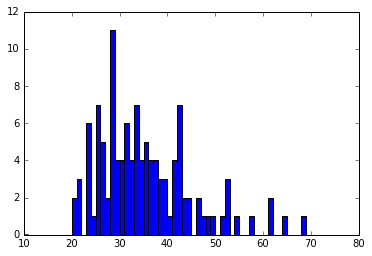

In [6]:
plt.figure()
plt.hist(ages_cleaned, bins=np.arange(10, 80))

In [7]:
backwards_data = pd.read_csv('mouselab-mdp.csv')
bw_test_data = backwards_data[backwards_data['block']=='test']
bw_train_data = backwards_data[backwards_data['block']=='training']
backwards_data.head()

,action_times,actions,block,path,queries,rewards,rt,score,simulation_mode,state_rewards,time_elapsed,trial_index,trial_time,trial_id,trial_type,pid
0,"[11407, 13565, 16237]","[u'up', u'up', u'right']",pre_test,"[u'0', u'1', u'2', u'3']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-4, 4, 24]","[11399, 1638, 2141]",24.0,"[None, None, None]","[u'', -4, 4, 24, 24, -2, -4, 48, -24, -4, 8, -...",105163,0.0,27011.0,-4.874666e+18,mouselab-mdp,0
1,"[14286, 63761, 65379]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-4, 4, 48]","[14277, 6954, 1091]",48.0,"[None, None, None]","[u'', -2, -4, 48, 24, 2, 4, -48, 48, -4, 4, 48...",200161,1.0,79154.0,7.946552e+18,mouselab-mdp,0
2,"[9878, 54493, 55901]","[u'left', u'left', u'down']",training,"[u'0', u'9', u'10', u'12']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, -4, 24]","[9873, 2089, 895]",18.0,"[None, None, None]","[u'', 4, 4, -48, 48, -2, 4, -48, -24, -2, -4, ...",261346,2.0,60098.0,-5.006810e+18,mouselab-mdp,0
3,"[31434, 32468, 33765]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, 8, 24]","[31430, 506, 769]",23.0,"[None, None, None]","[u'', 2, 4, -24, -48, -2, -4, -24, -24, -2, 8,...",299462,3.0,37033.0,1.182386e+16,mouselab-mdp,0
4,"[10192, 30207, 31577]","[u'left', u'left', u'up']",training,"[u'0', u'9', u'10', u'11']","{u'mouseover': {u'state': {u'target': [], u'ti...","[-2, -4, 24]","[10187, 1486, 855]",17.0,"[None, None, None]","[u'', -2, -8, 24, 48, -2, 8, -24, -24, -2, -4,...",335391,4.0,34849.0,-3.603402e+18,mouselab-mdp,0


In [8]:
pdf = pd.read_csv('participants.csv')
pdf.head()

,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version
0,1.48,0.002,312,True,1.0,1,0,Wed Feb 28 2018 12:37:15 GMT-0500 (EST),True,1A.5
1,1.74,0.002,312,True,1.0,1,1,Tue Feb 27 2018 19:01:38 GMT-0500 (Eastern Sta...,True,1A.5
2,1.02,0.002,312,True,1.0,1,2,Tue Feb 27 2018 18:02:03 GMT-0600 (Central Sta...,True,1A.5
3,1.77,0.002,312,True,1.0,1,3,Tue Feb 27 2018 14:02:37 GMT-0800 (Pacific Sta...,True,1A.5
4,1.68,0.002,312,True,1.0,1,4,Wed Feb 28 2018 12:29:44 GMT-0500 (Eastern Sta...,True,1A.5


In [9]:
perf = bw_test_data[['pid','score', 'trial_index']]
p_feedback = pdf[['pid', 'with_feedback']]
avg_score = pd.DataFrame(perf.groupby('pid')['score'].mean())
age_score = avg_score.merge(backwards_survey.set_index('Unnamed: 0')[['8']], how='outer', left_index=True, right_index=True)
age_score = age_score.merge(p_feedback.set_index('pid'), how='outer', left_index=True, right_index=True)
age_score = age_score.rename(columns={'8':'age'})
print(len(age_score['age']))

123


In [10]:
age_score[age_score['with_feedback'].isna()]

,score,age,with_feedback
50.0,37.90,32.000000,NaN
52.0,43.05,27.000000,NaN
81.0,42.30,NaN,NaN
100.0,41.85,37.000000,NaN
103.0,39.20,28.000000,NaN
106.0,26.25,26.000000,NaN
NaN,NaN,34.715517,NaN
NaN,NaN,9.820835,NaN
NaN,NaN,68.000000,NaN
NaN,NaN,20.000000,NaN


In [11]:
age_score = age_score.dropna(axis=0, how='any')
print(len(age_score['age']))
age_score[:10]

111


,score,age,with_feedback
0.0,34.55,39.0,True
1.0,41.05,31.0,True
2.0,23.10,51.0,True
3.0,41.75,33.0,True
4.0,39.40,33.0,True
5.0,42.55,25.0,False
6.0,23.60,23.0,False
7.0,44.20,41.0,True
8.0,43.65,40.0,True
9.0,39.90,42.0,True


In [12]:
first_five = perf[perf['trial_index'] < 16.0]
last_five = perf[perf['trial_index'] > 25.0]
age_score['first_five'] = first_five.groupby('pid')['score'].mean()
age_score['last_five'] = last_five.groupby('pid')['score'].mean()
age_score['improvement'] = age_score['last_five'] - age_score['first_five']
with_fb = age_score.query("with_feedback == True")
without_fb = age_score.query("with_feedback==False")

In [13]:
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['score']))
print(stats.spearmanr(with_fb['age'], with_fb['score']))
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['score']))
print(stats.spearmanr(without_fb['age'], without_fb['score']))

Stats for With Feedback
Pearson:  (-0.33381623217776335, 0.011927302321066768)
SpearmanrResult(correlation=-0.016292180912003438, pvalue=0.90513469013517167)
Pearson:  (-0.27856805302592885, 0.039453586261443317)
SpearmanrResult(correlation=-0.33479164108037363, pvalue=0.012475135922460358)


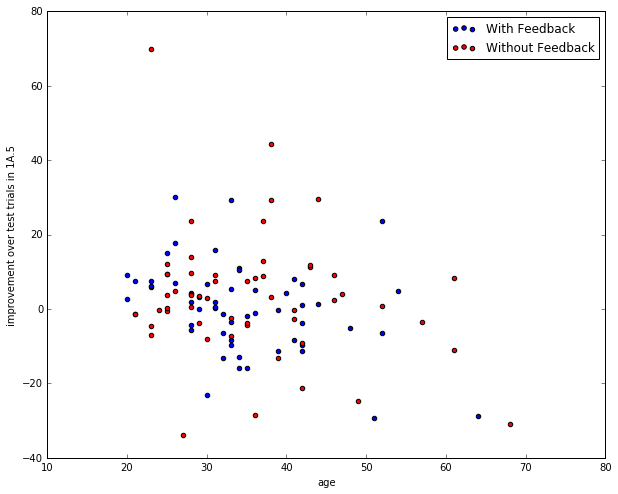

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(with_fb['age'], with_fb['improvement'], c='b', label='With Feedback')
plt.scatter(without_fb['age'],without_fb['improvement'], c='r', label='Without Feedback')
plt.xlabel('age')
plt.ylabel("improvement over test trials in 1A.5")
plt.legend()

In [15]:
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['improvement']))
print(stats.spearmanr(with_fb['age'], with_fb['improvement']))
print("Stats for Without Feedback")
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['improvement']))
print(stats.spearmanr(without_fb['age'], without_fb['improvement']))

Stats for With Feedback
Pearson:  (-0.36890450250807666, 0.0051454279481335918)
SpearmanrResult(correlation=-0.37815581270640919, pvalue=0.0040585218020627338)
Stats for Without Feedback
Pearson:  (-0.21601109475228042, 0.11320526604790372)
SpearmanrResult(correlation=-0.081866611930476868, pvalue=0.55238334668439371)


The above calculates "improvement" as the difference between the last five trials and the first five trials in the test block. The next few cells will calculate improvement as the last five trials in the test block minus performance in the pretest block.

In [16]:
pre_test_perf = backwards_data[backwards_data['block'] == 'pre_test']
pre_test_perf = pre_test_perf[['score', 'pid']].set_index("pid")
pre_test_perf = pre_test_perf.rename(columns={'score':'pretest'})
age_score = age_score.merge(pre_test_perf, how='outer', left_index=True, right_index=True)
age_score['diff'] = age_score['score'] - age_score['pretest']
print(len(age_score))
age_score = age_score.dropna()
print(len(age_score))

119
111


In [17]:
age_score.head()

,score,age,with_feedback,first_five,last_five,improvement,pretest,diff
0.0,34.55,39.0,True,36.0,24.6,-11.4,24.0,10.55
1.0,41.05,31.0,True,38.2,38.4,0.2,52.0,-10.95
2.0,23.10,51.0,True,42.2,12.8,-29.4,24.0,-0.90
3.0,41.75,33.0,True,49.0,40.6,-8.4,26.0,15.75
4.0,39.40,33.0,True,42.8,39.2,-3.6,21.0,18.40


In [18]:
with_fb = age_score.query("with_feedback == True")
without_fb = age_score.query("with_feedback==False")

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(with_fb[['age']], with_fb['diff'])
with_fb_pred = model.predict(with_fb[['age']])
model.fit(without_fb[['age']], without_fb['diff'])
without_fb_pred = model.predict(without_fb[['age']])

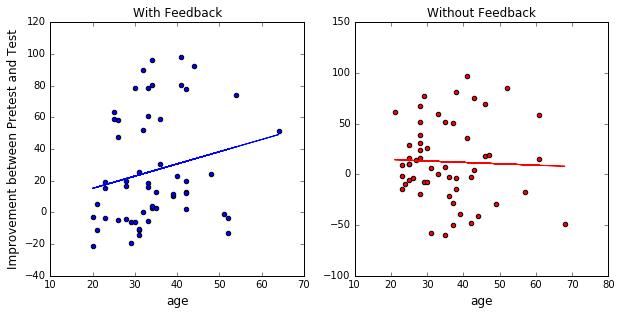

In [20]:
f = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(121)
plt.scatter(with_fb['age'], with_fb['diff'], c='b', label='With Feedback')
plt.plot(with_fb['age'], with_fb_pred)
plt.xlabel("age", fontsize=12)
plt.ylabel("Improvement between Pretest and Test", fontsize=12)
plt.title("With Feedback")
x0,x1 = ax1.get_xlim()
y0,y1 = ax1.get_ylim()
ax1.set_aspect(abs(x1-x0)/abs(y1-y0))
ax2 = plt.subplot(122)
plt.scatter(without_fb['age'],without_fb['diff'], c='r', label='Without Feedback')
plt.plot(without_fb['age'], without_fb_pred, c='r')
plt.xlabel('age', fontsize=12)
plt.title('Without Feedback')
x0,x1 = ax2.get_xlim()
y0,y1 = ax2.get_ylim()
ax2.set_aspect(abs(x1-x0)/abs(y1-y0))

In [21]:
print("Stats for With Feedback")
print('Pearson: ', stats.pearsonr(with_fb['age'], with_fb['diff']))
print(stats.spearmanr(with_fb['age'], with_fb['diff']))
print("Stats for Without Feedback")
print('Pearson: ', stats.pearsonr(without_fb['age'], without_fb['diff']))
print(stats.spearmanr(without_fb['age'], without_fb['diff']))

Stats for With Feedback
Pearson:  (0.20514070083422578, 0.12934503636314754)
SpearmanrResult(correlation=0.26351125502854916, pvalue=0.049728020083810741)
Stats for Without Feedback
Pearson:  (-0.036851287227979167, 0.7893845748507079)
SpearmanrResult(correlation=-0.046152812507828558, pvalue=0.73793057883798974)


In [22]:
perf.trial_index -= perf.trial_index.min()
perf.head()

C:\Users\piichan\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,pid,score,trial_index
11,0,44.0,0.0
12,0,18.0,1.0
13,0,32.0,2.0
14,0,48.0,3.0
15,0,38.0,4.0


In [23]:
age_df = backwards_survey[['Unnamed: 0', '8']]
age_df = age_df.rename(columns={'Unnamed: 0': 'pid', '8': 'age'})

In [24]:
training = bw_train_data[['pid','score', 'trial_index']]
training.trial_index -= training.trial_index.min()

C:\Users\piichan\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
learning = training.merge(age_df, how='outer', left_on='pid', right_on='pid')
learning = learning.dropna()

In [26]:
learning = learning.merge(pdf[['pid', 'with_feedback']], how='left', left_on='pid', right_on='pid')
learning.head()

,pid,score,trial_index,age,with_feedback
0,0,48.0,0.0,39.0,True
1,0,18.0,1.0,39.0,True
2,0,23.0,2.0,39.0,True
3,0,17.0,3.0,39.0,True
4,0,20.0,4.0,39.0,True


In [27]:
fb = learning[learning['with_feedback']==True]
no_fb = learning[learning['with_feedback']==False]
len(fb['pid'])/10

56.0

In [28]:
age = np.zeros(56)
slopes = np.zeros(56)

for i in np.arange(56):
    x = np.arange(10)
    y = fb.iloc[i*10:(i+1)*10, 1]
    age[i] = fb.iloc[i*10, 3]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes[i] = slope

In [29]:
age_slopes = pd.DataFrame()
age_slopes['age'] = age
age_slopes['slope'] = slopes
age_slopes['with_feedback'] = True

In [30]:
age_slopes = age_slopes.sort_values('age')

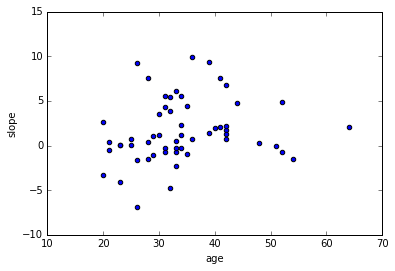

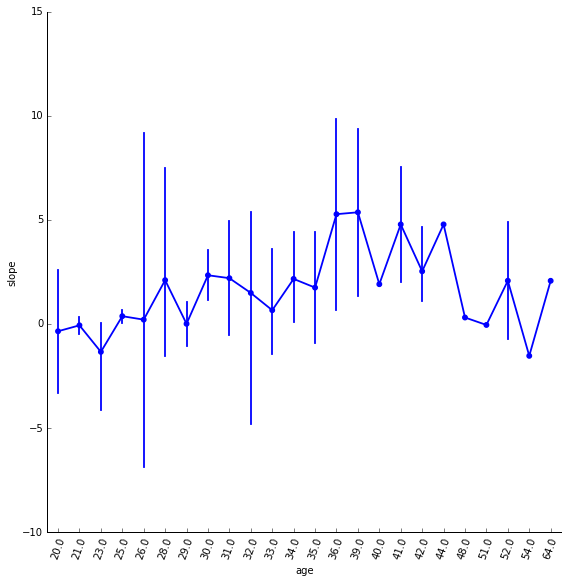

In [31]:
age_slopes.plot('age', 'slope', kind='scatter')
g = sns.factorplot(x='age', y='slope', data=age_slopes, size=8)
g.set_xticklabels(rotation=70)

In [32]:
print('Pearson: ', stats.pearsonr(age_slopes['age'], age_slopes['slope']))
print(stats.spearmanr(age_slopes['age'], age_slopes['slope']))

Pearson:  (0.19009946801210492, 0.16052067763065234)
SpearmanrResult(correlation=0.28534788065632088, pvalue=0.033029419612700547)


In [33]:
age = np.zeros(55)
slopes = np.zeros(55)

for i in np.arange(55):
    x = np.arange(10)
    y = no_fb.iloc[i*10:(i+1)*10, 1]
    age[i] = no_fb.iloc[i*10, 3]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    slopes[i] = slope

In [34]:
age_slopes_no_fb = pd.DataFrame()
age_slopes_no_fb['age'] = age
age_slopes_no_fb['slope'] = slopes
age_slopes_no_fb['with_feedback'] = False

In [35]:
age_slopes_no_fb = age_slopes_no_fb.sort_values('age')

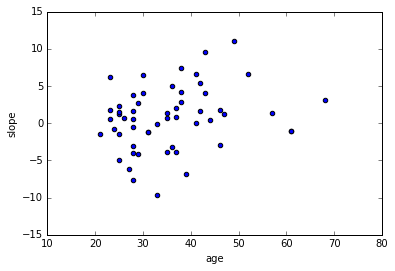

In [36]:
age_slopes_no_fb.plot('age', 'slope', kind='scatter')


In [37]:
print('Pearson: ', stats.pearsonr(age_slopes_no_fb['age'], age_slopes_no_fb['slope']))
print(stats.spearmanr(age_slopes_no_fb['age'], age_slopes_no_fb['slope']))

Pearson:  (0.2389507243350727, 0.078925918638530657)
SpearmanrResult(correlation=0.26889829200728776, pvalue=0.047130314237252662)


In [38]:
import statsmodels.formula.api as smf

model = smf.ols('score ~ trial_index * with_feedback * age', data=learning).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     12.34
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           2.88e-15
Time:                        13:43:51   Log-Likelihood:                -5362.2
No. Observations:                1110   AIC:                         1.074e+04
Df Residuals:                    1102   BIC:                         1.078e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                42.6317      8.495      5.018      0.000      25.963      59.300
with_feedback[T.True]                    -0.4487     12.540     -0.036      0.971     -25.054      24.157
trial_index                              -2.5886      1.591     -1.627      0.104      -5.711       0.534
trial_index:with_feedback[T.True]         1.7711      2.349      0.754      0.451      -2.838       6.380
age                                      -0.8321      0.229     -3.637      0.000      -1.281      -0.383
with_feedback[T.True]:age                 0.2338      0.346      0.675      0.500      -0.446       0.913
trial_index:age                           0.0938      0.043      2.189      0.029       0.010       0.178
trial_index:with_feedback[T.True]:age    -0.0220      0.065     -0.339      0.734      -0.149       0.105
==============================================================================
Omnibus:                      158.237   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.520
Skew:                          -1.083   Prob(JB):                     3.93e-50
Kurtosis:                       3.474   Cond. No.                     3.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(model)

C:\Users\piichan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [40]:
print(aov_table)

                                   df        sum_sq       mean_sq          F  \
with_feedback                     1.0  4.464229e+04  44642.286446  48.204072   
trial_index                       1.0  1.321201e+04  13212.012039  14.266133   
trial_index:with_feedback         1.0  1.820972e+03   1820.972223   1.966259   
age                               1.0  1.336658e+04  13366.579434  14.433032   
with_feedback:age                 1.0  4.841451e+02    484.145108   0.522773   
trial_index:age                   1.0  6.343972e+03   6343.971733   6.850126   
trial_index:with_feedback:age     1.0  1.065987e+02    106.598686   0.115104   
Residual                       1102.0  1.020574e+06    926.110277        NaN   

                                     PR(>F)  
with_feedback                  6.548089e-12  
trial_index                    1.671759e-04  
trial_index:with_feedback      1.611272e-01  
age                            1.531697e-04  
with_feedback:age              4.698148e-01  
tri

In [41]:
learning = learning.merge(age_score.reset_index()[['index','pretest']], how='left', left_on='pid', right_on='index')

In [42]:
import statsmodels.formula.api as smf

model = smf.ols('score ~ trial_index * with_feedback * age * pretest', data=learning).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     6.330
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           5.01e-13
Time:                        13:43:52   Log-Likelihood:                -5357.9
No. Observations:                1110   AIC:                         1.075e+04
Df Residuals:                    1094   BIC:                         1.083e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        43.5929      9.451      4.612      0.000      25.048      62.138
with_feedback[T.True]                            -5.9330     13.700     -0.433      0.665     -32.814      20.948
trial_index                                      -3.6208      1.770     -2.045      0.041      -7.095      -0.147
trial_index:with_feedback[T.True]                 3.5874      2.566      1.398      0.162      -1.448       8.623
age                                              -0.8455      0.249     -3.398      0.001      -1.334      -0.357
with_feedback[T.True]:age                         0.3513      0.369      0.953      0.341      -0.372       1.075
trial_index:age                                   0.1153      0.047      2.474      0.014       0.024       0.207
trial_index:with_feedback[T.True]:age            -0.0605      0.069     -0.877      0.381      -0.196       0.075
pretest                                          -0.0389      0.264     -0.147      0.883      -0.557       0.479
with_feedback[T.True]:pretest                     0.1272      0.364      0.349      0.727      -0.587       0.841
trial_index:pretest                               0.0589      0.049      1.190      0.234      -0.038       0.156
trial_index:with_feedback[T.True]:pretest        -0.0979      0.068     -1.437      0.151      -0.232       0.036
age:pretest                                   -5.914e-05      0.007     -0.009      0.993      -0.013       0.013
with_feedback[T.True]:age:pretest                 0.0003      0.010      0.036      0.972      -0.019       0.020
trial_index:age:pretest                          -0.0011      0.001     -0.880      0.379      -0.004       0.001
trial_index:with_feedback[T.True]:age:pretest     0.0019      0.002      1.027      0.305      -0.002       0.005
==============================================================================
Omnibus:                      159.098   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.001
Skew:                          -1.083   Prob(JB):                     1.88e-50
Kurtosis:                       3.514   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
aov_table = sm.stats.anova_lm(model)
print(aov_table)

                                           df        sum_sq       mean_sq  \
with_feedback                             1.0  4.464229e+04  44642.286446   
trial_index                               1.0  1.321201e+04  13212.012039   
trial_index:with_feedback                 1.0  1.820972e+03   1820.972223   
age                                       1.0  1.336658e+04  13366.579434   
with_feedback:age                         1.0  4.841451e+02    484.145108   
trial_index:age                           1.0  6.343972e+03   6343.971733   
trial_index:with_feedback:age             1.0  1.065987e+02    106.598686   
pretest                                   1.0  1.779011e+03   1779.010991   
with_feedback:pretest                     1.0  5.244868e+00      5.244868   
trial_index:pretest                       1.0  3.145176e+01     31.451761   
trial_index:with_feedback:pretest         1.0  2.383361e+03   2383.361001   
age:pretest                               1.0  9.198570e+01     91.985702   

C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\piichan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SpearmanrResult(correlation=-0.21697614049389299, pvalue=0.022170719048598079)


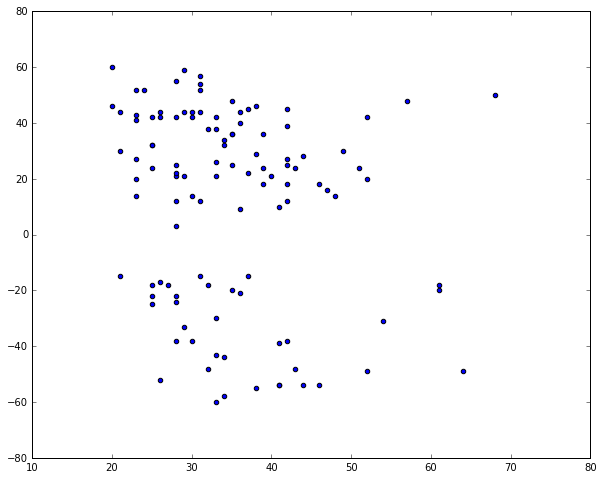

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(age_score['age'], age_score['pretest'])
print(stats.spearmanr(age_score['age'], age_score['pretest']))

In [45]:
len(ages_cleaned[(ages_cleaned>20) & (ages_cleaned<30)])

39

In [46]:
len(ages_cleaned[ages_cleaned<26])

19

In [4]:
pwd

'C:\\Users\\piichan\\Documents\\Berkeley\\CoCoSci Lab\\mcrl\\mcrl\\backward_planning\\experiment1\\data\\human\\1A.5'

In [5]:
cd ../../../../age_planning/data/human/A1.0

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\mcrl\mcrl\backward_planning\age_planning\data\human\A1.0


## A1.0

In [7]:
pretest_survey = pd.read_csv('survey.csv')
pretest_survey.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,25,female,full time,USA,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,30,female,freelance,usa,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,36,Male,Self-Employed,United States of America,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,24,female,employed part-time,USA,1,i decided the small nodes didn't have much val...,I realized that the end nodes had the highest ...,One of the outer nodes,I stopped clicking when I found a +48 because ...,No,no,How to create a strategy to earn the most poin...,NaN
4,4,28,male,self-employed,United States,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pretest_survey.tail()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12
343,343,30,Female,Part Time,USA,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
344,344,30,male,"employed , warehouse manager and sales associate",USA,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,345,32,Male,Employed Full-Time,United States of America,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,346,39,female,homemaker,United States,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,347,25,female,full time,US,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pretest_ages = pretest_survey['0']
np.sort(pretest_ages)

array([19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31,
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33,
       33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 34

In [10]:
np.mean(pretest_ages[pretest_ages>47])

55.02857142857143

In [11]:
pdf = pd.read_csv('participants.csv')
pdf.tail()

,Unnamed: 0,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version
343,343,0.0,0.0015,312,True,1,1,343,Sat Apr 07 2018 00:18:00 GMT-0500 (CDT),True,A1.0
344,344,0.0,0.0015,312,True,0,1,344,Wed Apr 04 2018 17:06:36 GMT-0400 (Eastern Day...,False,A1.0
345,345,0.0,0.0015,312,True,1,1,345,Fri Apr 06 2018 17:36:09 GMT-0400 (Eastern Day...,True,A1.0
346,346,0.0,0.0015,312,True,0,1,346,Wed Apr 04 2018 15:19:11 GMT-0400 (Eastern Day...,False,A1.0
347,347,0.0,0.0015,312,True,1,1,347,Thu Apr 05 2018 11:30:24 GMT-0400 (EDT),True,A1.0


In [12]:
time_info = pd.read_csv('survey-text.csv')
time_info.head()

,pid,responses,rt,time_elapsed
0,0,"{""Q0"":""female"",""Q1"":""25"",""Q2"":""USA"",""Q3"":""full...",16668,16685
1,1,"{""Q0"":""female"",""Q1"":""30"",""Q2"":""usa"",""Q3"":""free...",15039,15052
2,2,"{""Q0"":""Male"",""Q1"":""36"",""Q2"":""United States of ...",34450,34484
3,3,"{""Q0"":""female"",""Q1"":""24"",""Q2"":""USA"",""Q3"":""empl...",17488,17511
4,3,"{""Q0"":""I realized that the end nodes had the h...",108674,629984


In [13]:
minutes_spent = time_info.groupby('pid')['time_elapsed'].max()/60000

In [14]:
np.mean(minutes_spent[minutes_spent>3])

12.11615274725275

In [15]:
# pdf_ids = pdf.merge(pretest_survey[['Unnamed: 0', '0']], left_on='pid', right_on='Unnamed: 0')
pdf_ids.head()

,Unnamed: 0_x,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version,Unnamed: 0_y,0
0,0,0.0,0.0015,312,True,0,1,0,Fri Apr 06 2018 18:58:07 GMT-0500 (CDT),False,A1.0,0,25
1,1,0.0,0.0015,312,True,1,1,1,Fri Apr 06 2018 12:38:20 GMT-0500 (Central Day...,True,A1.0,1,30
2,2,0.0,0.0015,312,True,1,1,2,Fri Apr 06 2018 17:41:55 GMT-0400 (Eastern Day...,True,A1.0,2,36
3,3,2.2,0.0015,312,True,0,1,3,Thu Apr 05 2018 18:26:07 GMT-0500 (CDT),False,A1.0,3,24
4,4,0.0,0.0015,312,True,0,1,4,Wed Apr 04 2018 15:34:08 GMT-0400 (EDT),False,A1.0,4,28


In [99]:
#set bonuses to 0 for those who didn't qualify
# pdf_ids['bonus'].where((pdf_ids['0']<25) | (pdf_ids['0']>47), 0, inplace=True)
# pdf_ids.head()

,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version,Unnamed: 0,0
0,0.0,0.0015,312,True,0,1,0,Fri Apr 06 2018 18:58:07 GMT-0500 (CDT),False,A1.0,0,25
1,0.0,0.0015,312,True,1,1,1,Fri Apr 06 2018 12:38:20 GMT-0500 (Central Day...,True,A1.0,1,30
2,0.0,0.0015,312,True,1,1,2,Fri Apr 06 2018 17:41:55 GMT-0400 (Eastern Day...,True,A1.0,2,36
3,2.2,0.0015,312,True,0,1,3,Thu Apr 05 2018 18:26:07 GMT-0500 (CDT),False,A1.0,3,24
4,0.0,0.0015,312,True,0,1,4,Wed Apr 04 2018 15:34:08 GMT-0400 (EDT),False,A1.0,4,28


In [16]:
# pdf_ids.drop(labels=['Unnamed: 0_x','Unnamed: 0_y', '0'],axis=1, inplace=True)
# pdf_ids.head()

,bonus,bonusRate,branching,completed,condition,inspectCost,pid,startTime,with_feedback,version
0,0.0,0.0015,312,True,0,1,0,Fri Apr 06 2018 18:58:07 GMT-0500 (CDT),False,A1.0
1,0.0,0.0015,312,True,1,1,1,Fri Apr 06 2018 12:38:20 GMT-0500 (Central Day...,True,A1.0
2,0.0,0.0015,312,True,1,1,2,Fri Apr 06 2018 17:41:55 GMT-0400 (Eastern Day...,True,A1.0
3,2.2,0.0015,312,True,0,1,3,Thu Apr 05 2018 18:26:07 GMT-0500 (CDT),False,A1.0
4,0.0,0.0015,312,True,0,1,4,Wed Apr 04 2018 15:34:08 GMT-0400 (EDT),False,A1.0


In [106]:
#pdf_ids.to_csv('participants.csv')

In [115]:
bonuses = pdf_ids[pdf_ids['bonus'] != 0]['bonus']
np.mean(bonuses)

1.6415555555555557

In [117]:
np.unique(pretest_survey['1'])

array(['Big Man', 'F', 'FEMALE', 'Female', 'Female ', 'M', 'MALE', 'Make',
       'Male', 'Man', 'Non-binary', 'female', 'female`', 'm', 'male',
       'non-binary', 'transgender'], dtype=object)